When I watched the movie "Titanic" twenty years ago, I had wondered whether most survivors were women and children. Today, thanks to this project, I can figure it out. Also, I'm interested in finding out whether the richer with a first class ticket had a higher chance of survival compared to the other 2 classes. Finally, I wanted to analyze how ticket price index differs in 3 different cities. I will focus on the data I retrieved from https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv (data description reference:  https://www.kaggle.com/c/titanic/data ), which contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.
So, here are my questions:
1. What proportion of total survivors are women?
2. Is the survival rate of children (under 12) higher than the others?
3. Did the passengers of first class have a higher chance of survival compared to
the other 2 classes and the crew?
4. How did the price index differ in 3 different cities? In other words, how many
tickets of class 3 could be bought if we paid the price of class 1 in 3 different cities?


In [2]:
import pandas as pd
import numpy as np
filename = '/Users/KunWuYao/Desktop/Python shortcut/Python Exercise ver3/Udacity/Data Analyst Nanodegree/Project2/titanic-data.csv'
titan_df = pd.read_csv(filename)
print (titan_df.info())
titan_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


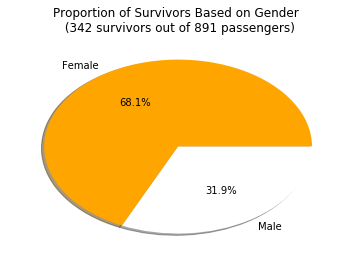

In [3]:
# Code for Q1
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec # refer to http://matplotlib.org/examples/pylab_examples/pie_demo2.html

survivors_filter = titan_df.groupby('Sex', as_index = False).sum()['Survived']
#print(survivors_filter/survivors_filter.sum() * 100)
survivor_labels = 'Female', 'Male'
survivor_colors = 'orange', 'w'
plt.pie(survivors_filter, labels = survivor_labels, colors = survivor_colors, autopct='%1.1f%%', shadow = True)
plt.title('Proportion of Survivors Based on Gender \n (%d survivors out of %d passengers)' % (survivors_filter.sum(), len(titan_df)))
plt.show()

As you can see from the pie chart, female survivors made up of 68.1% from the total. This result is below my expectation, because when we say "most", we usually think of it as being more than 80%. In this case, the percentage was less than 70%. However, we must also keep in mind that we only have information from 891 of the 2224 passengers and crew on board the Titanic, the result might not represent the trend of the whole population properly.

In [4]:
#Code for Q2
categories = ['Child','Teenager','Adult','Elder','Unknown']
def survivor_counter(self):
    for i in self['Age']:
        if i <= 12:
            self['Category'] = categories[0]
        elif i <= 18:
            self['Category'] = categories[1]
        elif i <= 60:
            self['Category'] = categories[2]
        elif i <= 120:
            self['Category'] = categories[3]
        else:
            self['Category'] = categories[4]
    return self
age_filter = titan_df.groupby('PassengerId')[['Survived', 'Age']].apply(survivor_counter)
#reference http://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas

#calculate survival percentage, first count total numbers for every category.
age_counter = [len(age_filter[(age_filter.Category == categories[0])]), 
                   len(age_filter[(age_filter.Category == categories[1])]), 
                   len(age_filter[(age_filter.Category == categories[2])]),
                   len(age_filter[(age_filter.Category == categories[3])]),
                   len(age_filter[(age_filter.Category == categories[4])])]
print(age_counter)
age_survival_count = []
age_survival_rate = []
for i in range(0,5):
    age_survival_count.append(age_filter[(age_filter.Category == categories[i])]['Survived'].sum())
    age_survival_rate.append(age_survival_count[i]/age_counter[i])
print(age_survival_count, age_survival_rate)


[69, 70, 553, 22, 177]
[40, 30, 215, 5, 52] [0.5797101449275363, 0.42857142857142855, 0.3887884267631103, 0.22727272727272727, 0.2937853107344633]


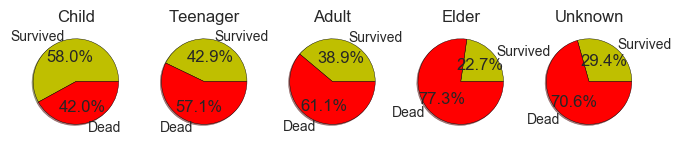

In [4]:
#Plot for Q2
sur_labels = ['Survived', 'Dead']
the_grid = GridSpec(1,5)
for i in range(0,5):
    plt.subplot(the_grid[0, i], aspect = 1)
    plt.pie([age_survival_rate[i], (1-age_survival_rate[i])], labels=sur_labels, autopct='%1.1f%%', colors = ['y','r'], shadow = True)
    plt.title('%s' % (categories[i]))
plt.show()

From the pie charts above calculated from the survival rates out of the 891 passengers, not surprisingly children aboard the Titanic had the highest chance of survival and the eldery had the lowest. This information and the first chart on proportion based on gender give support to the quote in the movie "Women and children first" and make the movie more consistent with the fact.

Although the statistical results seem reasonable, this may not be the complete picture given there are 177 passengers without age information.

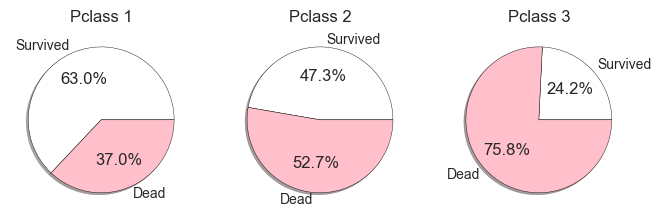

In [5]:
#Code for Q3
pclass = [1,2,3]
class_counter = []
class_survival_counter = []
class_survival_rate = []
the_grid2 = GridSpec(1,3)

for i in range(0,3):
    class_counter.append(len(titan_df[(titan_df['Pclass'] == i+1)]))
    class_survival_counter.append(titan_df[(titan_df['Pclass'] == i+1)]['Survived'].sum()) #can be filtered twice in one time
    class_survival_rate.append(class_survival_counter[i] / class_counter[i])
    plt.subplot(the_grid2[0, i], aspect = 1)
    plt.pie([class_survival_rate[i], 1 - class_survival_rate[i]], labels = sur_labels, colors = ['w','pink'], autopct='%1.1f%%', shadow=True)
    plt.title('Pclass %d' % pclass[i])
plt.show()
#print(class_counter, class_survival_counter, class_survival_rate)



Compared to the survival rate of passengers in third class, those in first class had a much higher chance of surviving the tragedy, which was a sad but realistic fact: If you pay a higher price, you would receive better service, or in other words, a higher chance of survival.

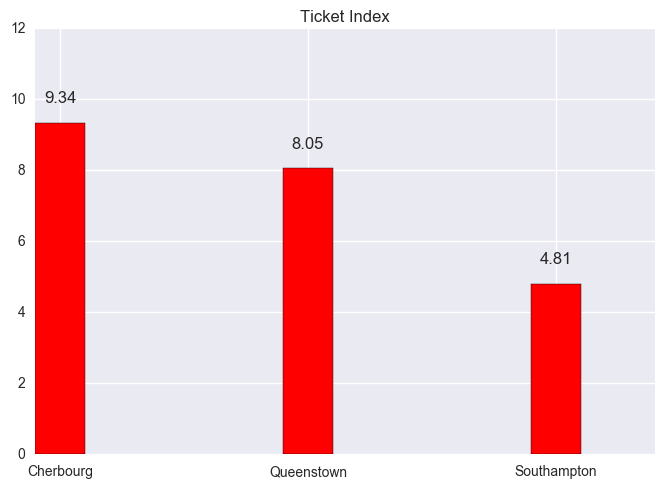

(([99.093934969650107, 0.0, 58.811277761795559], [4.8715283536257372, 6.7216765116820048, 13.276608721649458]), [Pclass
1    104.718529
2     25.358335
3     11.214083
Name: Fare, dtype: float64, Pclass
1    90.000000
2    12.350000
3    11.183393
Name: Fare, dtype: float64, Pclass
1    70.364862
2    20.327439
3    14.644083
Name: Fare, dtype: float64])


In [6]:
#Code for Q4
#Get data from each city, C for Cherbourg, Q for Queenstown, and S for Southampton
cities = ['C', 'Q', 'S']
city_names = ['Cherbourg', 'Queenstown', 'Southampton']
price_mean = []
#Get each Pclass group from 3 cities then compute the mean fare
def city_pclass_calculator():
    city_pclass_index, city_pclass1_std, city_pclass3_std = [], [], [] # set many empty lists in 1 code line
    for i in range(0,3):
        q4_filter1 = titan_df[(titan_df['Embarked'] == cities[i])]
        city_pclass_index.append(q4_filter1.groupby('Pclass')['Fare'].mean().iloc[0]/q4_filter1.groupby('Pclass')['Fare'].mean().iloc[2])
        city_pclass1_std.append(q4_filter1.groupby('Pclass')['Fare'].std().iloc[0])
        city_pclass3_std.append(q4_filter1.groupby('Pclass')['Fare'].std().iloc[2])
        #Apply iloc to extract values    #city_pclass_counter[0].iloc[0]
        bar1 = plt.bar(i+1, city_pclass_index[i], width=0.2, color = 'r')
        plt.text(i+1.1, city_pclass_index[i]+0.5, '%.2f' % float(city_pclass_index[i]), ha = 'center', va = 'bottom')
        #bar2 = plt.bar(i+1.2, city_pclass1_std[i], width=0.2, color = 'b')
        #plt.text(i+1.3, city_pclass1_std[i]+0.5, '%.2f' % float(city_pclass1_std[i]), ha = 'center', va = 'bottom')
        #bar3 = plt.bar(i+1.4, city_pclass3_std[i], width=0.2, color = 'g')
        #plt.text(i+1.5, city_pclass3_std[i]+0.5, '%.2f' % float(city_pclass3_std[i]), ha = 'center', va = 'bottom')
        price_mean.append(q4_filter1.groupby('Pclass')['Fare'].mean())
    plt.xticks([1.1,2.1,3.1], city_names)
    plt.yticks(range(0,14,2))
    plt.title('Ticket Index')
    #plt.legend((bar1[0], bar2[0], bar3[0]), ('Ticket index', 'Std for 1st Pclass', 'Std for 3rd Pclass'))
    plt.show()
    return (city_pclass1_std, city_pclass3_std), price_mean

print(city_pclass_calculator())

From the bar chart, we can see that Cherbourg had the highest index value (each first class ticket could be exchanged for 9.34 third class tickets), which is much higher than the 4.81 in Southampton.
This statistic implies that the wealth disparity in Cherbourg was much greater than Southampton, but can we say it for sure? When making this chart, I also extracted the standard deviations of the fare of tickets in first and third class, and noticed the standard deviations were quite large. To explore more and make sure that I derived a firm conclusion, I wrote some more code lines to plot the distribution by port and passenger ticket class.

In [7]:
from plotly.graph_objs import *
#import plotly.plotly as py #not imported in private mode
#import plotly.graph_objs as go #not imported in private mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

x_data = []
#No need to set x if your data type is dataframe
y_data,len_count,box_ploting_data = [],[],[]
colors = ['#FF4136','#3D9970','#FF851B','#FF4136','#3D9970','#FF851B','#FF4136','#3D9970','#FF851B']
def city_pclass_boxplot():
    for i in range(0,3):
        q4_filter1 = titan_df[(titan_df['Embarked'] == cities[i])][['Pclass','Fare','Embarked']] #filter data by ticket classes
        q4_filter1.Embarked = city_names[i]
        for j in range(1,4):
            y_data.append(q4_filter1[(q4_filter1['Pclass'] == j)]['Fare'].values) # 0~2 for Cherbourg, 3~5 for Queenstown, 6~8 for Southampton
            x_data.append(q4_filter1[(q4_filter1['Pclass'] == j)]['Embarked'].values)
            #U can apply set_index to categorize, but it would still output a dataframe,
            #apply df.values to convert data into a array for ploting
    pclass = [1,2,3,1,2,3,1,2,3]
    for i in range(0,len(y_data)):
        len_count.append(len(y_data[i]))
    #Check whether all samples are included
        trace0 = Box(y = y_data[i], x = x_data[i], name = 'Ticket class %d' % pclass[i], 
            boxpoints='all',pointpos=20, #Remove scatter
            marker=dict(
            color=colors[i], size = 2),
            line=dict(width=1))
        layout = Layout(title='Fare Distribution by Class and Port',
            yaxis=dict(
            zeroline = False,
            dtick=40),
            boxmode='group',
            showlegend=False)
        box_ploting_data.append(trace0)
    fig = Figure(data=box_ploting_data, layout=layout)
    iplot(fig)
    return sum(len_count)

city_pclass_boxplot()

889

As you can see, there are many outliers in all cities, the maximum in Cherbourg is even up to \$512 for one first class ticket while the median is about \$78. Besides the outliers, the samples of first and second class in Queenstown are too few to build a strong and reliable correlation. Finally, the sample size should be 891 passengers, but there were 2 passengers without port data and not grouped in any class, which may affect our conclusion as well.

After going through all the investigating procedures based on 342 survivors out of the 891 passengers, here are my findings:
1. Female survivors made up 68.1% of the total;
2. Compared to the other age ranges, children aboard the Titanic had a higher chance (58.0%) of survival;
3. Compared to the other two ticket classes, the passengers with first class ticket had a higher chance (63.0%) of survival; and
4. Cherbourg had the highest index value (each first class ticket could be exchanged for 9.34 third class tickets), which is much higher than the 4.81 in Southampton.

However, we should keep in mind that:
1. Not all 2224 people aboard the Titanic are included; the sample consists of only 891 passengers and zero crew, which may not properly draw a whole picture about the people on board;
2. There are many missing values; for example, the age and port information are unrecorded for 177 and 2 passengers, respectively, which may make our findings unreliable; and
3. There are many outliers in some categories and undersized samples in some others when exploring the data of ticket fare, which may lead us to incorrect conclusions as well.

In [8]:
#Reference code #1
df = pd.DataFrame({'name': ['Zed'], 'age': [9], 'height': [2]}) # empty DataFrame = pd.DataFrame()
df = df.append({'name': 'Zed', 'age': 9, 'height': 2}, ignore_index=True)
df = df.append({'name': 'Zed', 'age': 9, 'height': 2, 'AA': 'BB'}, ignore_index=True)
df # reference http://stackoverflow.com/questions/16597265/appending-to-an-empty-data-frame-in-pandas

,age,height,name,AA
0,9,2,Zed,NaN
1,9,2,Zed,NaN
2,9,2,Zed,BB


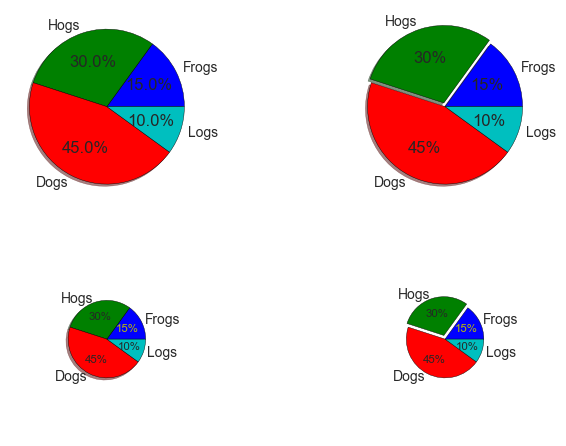

In [9]:
#Reference code #2
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Some data

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

explode = (0, 0.05, 0, 0)

# Make square figures and axes

the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

plt.subplot(the_grid[0, 1], aspect=1)

plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)

plt.subplot(the_grid[1, 0], aspect=1)

patches, texts, autotexts = plt.pie(fracs, labels=labels,
                                    autopct='%.0f%%',
                                    shadow=True, radius=0.5)

# Make the labels on the small plot easier to read.
for t in texts:
    t.set_size('smaller')
for t in autotexts:
    t.set_size('x-small')
autotexts[0].set_color('y')

plt.subplot(the_grid[1, 1], aspect=1)

# Turn off shadow for tiny plot with exploded slice.
patches, texts, autotexts = plt.pie(fracs, explode=explode,
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=0.5)
for t in texts:
    t.set_size('smaller')
for t in autotexts:
    t.set_size('x-small')
autotexts[0].set_color('y')

plt.show()

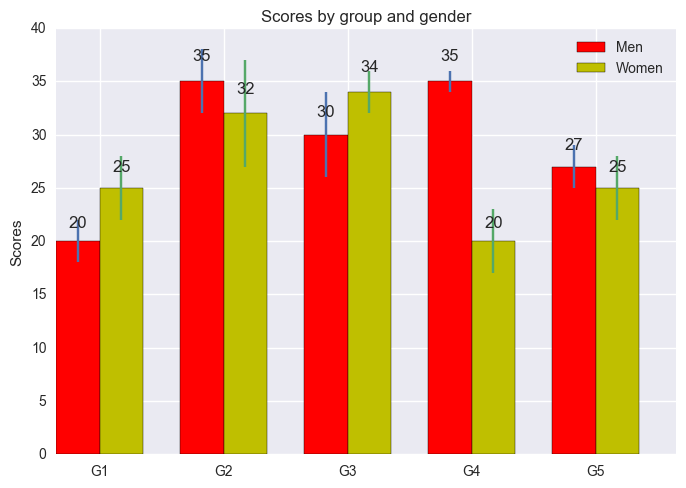

In [10]:
#Reference code #3
# http://matplotlib.org/examples/api/barchart_demo.html
#!/usr/bin/env python
# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
menStd = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, womenMeans, width, color='y', yerr=womenStd)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

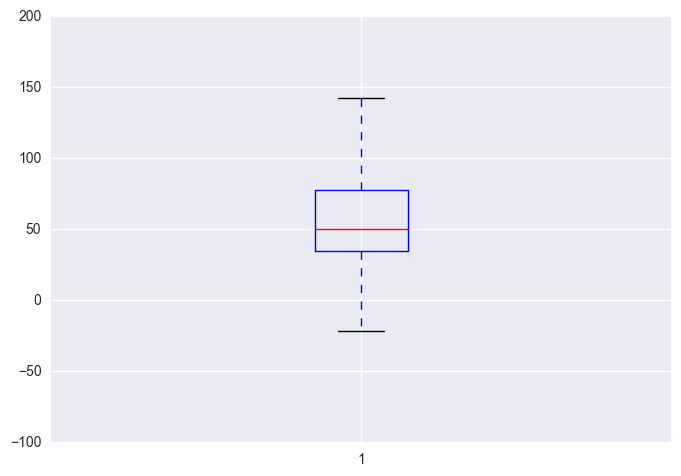

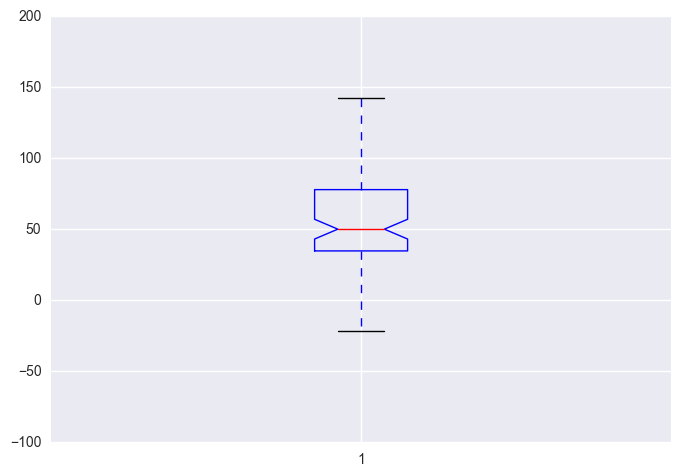

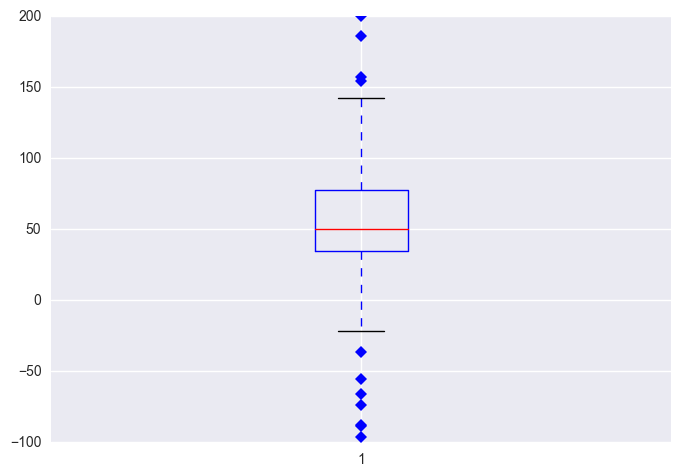

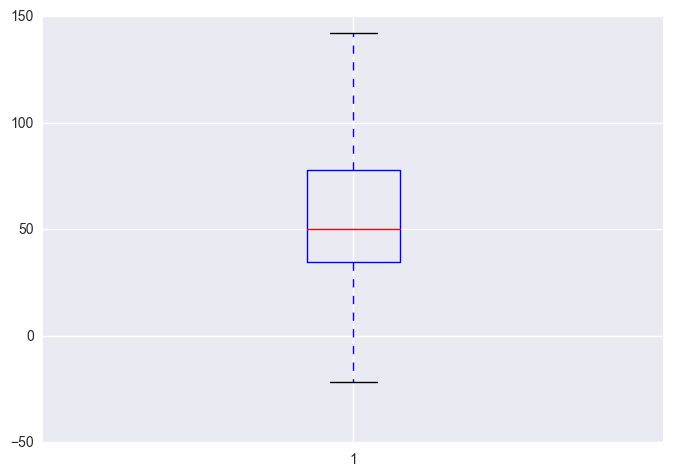

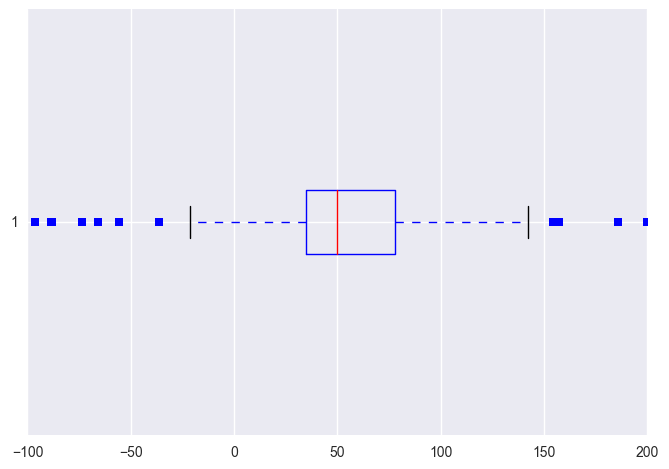

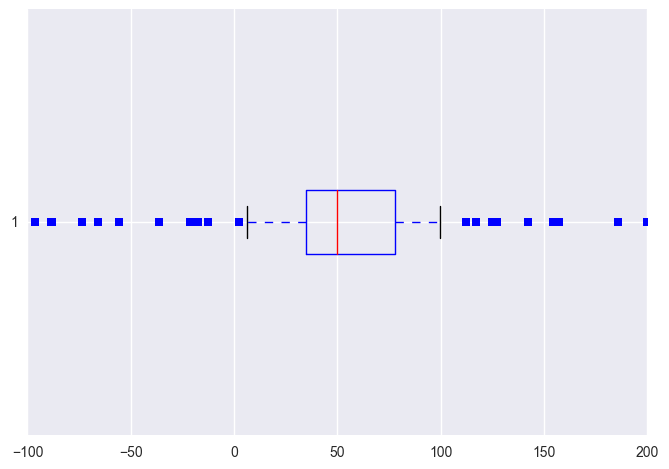

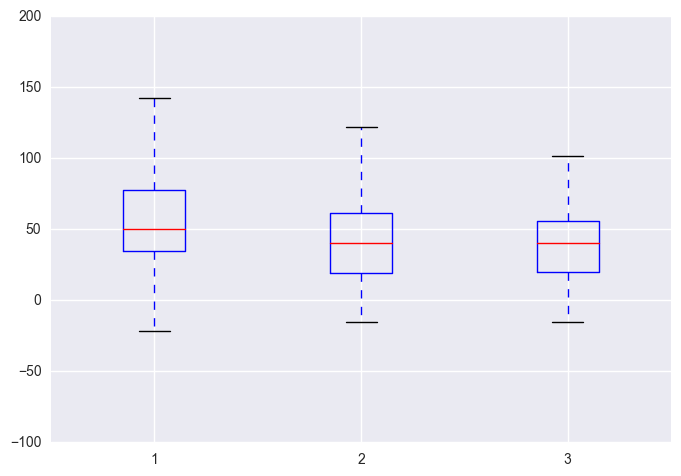

In [11]:
#Reference code #4
#Boxplot reference http://matplotlib.org/examples/pylab_examples/boxplot_demo.html
#What is boxplot? https://en.wikipedia.org/wiki/Box_plot
import matplotlib.pyplot as plt
import numpy as np

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)
# basic plot
plt.boxplot(data)

# notched plot
plt.figure()
plt.boxplot(data, 1)

# change outlier point symbols
plt.figure()
plt.boxplot(data, 0, 'gD')

# don't show outlier points
plt.figure()
plt.boxplot(data, 0, '')

# horizontal boxes
plt.figure()
plt.boxplot(data, 0, 'rs', 0)

# change whisker length
plt.figure()
plt.boxplot(data, 0, 'rs', 0, 0.75)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)

plt.show()

In [12]:
#Reference code #5
# reference https://www.reddit.com/r/IPython/comments/3tibc8/tip_on_how_to_run_plotly_examples_in_offline_mode/
from plotly.graph_objs import *
#import plotly.plotly as py #not imported in private mode
#import plotly.graph_objs as go #not imported in private mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


x_data = ['Carmelo Anthony', 'Dwyane Wade',
          'Deron Williams', 'Brook Lopez',
          'Damian Lillard', 'David West',]

y0 = np.random.randn(50)-1
y1 = np.random.randn(50)+1
y2 = np.random.randn(50)
y3 = np.random.randn(50)+2
y4 = np.random.randn(50)-2
y5 = np.random.randn(50)+3

y_data = [y0,y1,y2,y3,y4,y5]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']

traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = Layout(
    title='Points Scored by the Top 9 Scoring NBA Players in 2012',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = Figure(data=traces, layout=layout)
iplot(fig)


In [13]:
#Reference code #6
#https://plot.ly/python/box-plots/#box-plot-styling-mean--standard-deviation
x = ['day 1', 'day 1', 'day 1', 'day 1', 'day 1', 'day 1',
     'day 2', 'day 2', 'day 2', 'day 2', 'day 2', 'day 2']

trace0 = Box(
    y=[0.2, 0.2, 0.6, 1.0, 0.5, 0.4, 0.2, 0.7, 0.9, 0.1, 0.5, 0.3],
    x=x,
    name='kale',
    marker=dict(
        color='#3D9970'
    )
)
trace1 = Box(
    y=[0.6, 0.7, 0.3, 0.6, 0.0, 0.5, 0.7, 0.9, 0.5, 0.8, 0.7, 0.2],
    x=x,
    name='radishes',
    marker=dict(
        color='#FF4136'
    )
)
trace2 = Box(
    y=[0.1, 0.3, 0.1, 0.9, 0.6, 0.6, 0.9, 1.0, 0.3, 0.6, 0.8, 0.5],
    x=x,
    name='carrots',
    marker=dict(
        color='#FF851B'
    )
)
data = [trace0, trace1, trace2]
layout = Layout(
    yaxis=dict(
        title='normalized moisture',
        zeroline=False
    ),
    boxmode='group'
)
fig = Figure(data=data, layout=layout)
iplot(fig)

In [170]:
#Reference code #7
#https://plot.ly/pandas/box-plots/
import string
import pandas as pd
import numpy as np
from plotly.graph_objs import *
#import plotly.plotly as py #not imported in private mode
#import plotly.graph_objs as go #not imported in private mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

N = 100
y_vals = {}
for letter in list(string.ascii_uppercase):
     y_vals[letter] = np.random.randn(N)+(3*np.random.randn())
        
df = pd.DataFrame(y_vals)
#df.head()

data = []

for col in df.columns:
    data.append(  Box( y=df[col], name=col, showlegend=False ) )

data.append( Scatter( x = df.columns, y = df.mean(), mode='lines', name='mean' ) )

# IPython notebook
# py.iplot(data, filename='pandas-box-plot')

url = plot(data, filename='pandas-box-plot')